<a href="https://colab.research.google.com/github/SoniaPMi/AI-3-PyTorch/blob/main/ConvTranspose2D_examples_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ConvTranspose2D examples

In [1]:
import torch
import torch.nn as nn

In [3]:
# Syntax:
# torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, 
#groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None)

# Input: (N,Cin,Hin,Win) N=tamaño batch
# Output: (N,Cout, Hout, Wout)

# Donde:
# Hout=(Hin−1)×stride[0]−2×padding[0]+dilation[0]×(kernel_size[0]−1)+output_padding[0]+1
# Wout=(Win−1)×stride[1]−2×padding[1]+dilation[1]×(kernel_size[1]−1)+output_padding[1]+1

# Convertir de 16 canales a 33 usando un kernel cuadrado 3x3, stride=2 y sin padding
m = nn.ConvTranspose2d(16, 33, 2)
# La misma conversión pero con kernel rectangular: H=3, W=5, stride asimétrico (2 en H y 1 en W) y padding asimétrico (4 en H y 2 en W)
m2 = nn.ConvTranspose2d(16, 33, (3,5), stride=(2,1), padding=(4,2))

In [10]:
# Definir un tensor de entrada random
input = torch.randn(20,16,50,100)
output = m(input)
print(output.shape)

output2 = m2(input)
print(output2.shape)


torch.Size([20, 33, 51, 101])
torch.Size([20, 33, 93, 100])


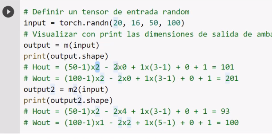

Vamos a ver el efecto de especificar las dimensiones de salida mediante el parámetro output_size.

In [17]:
# Primero define un tensor random de 16 canales e imágenes de  H=12, W=12
input = torch.randn(1, 16, 12, 12) #batch size = 1
# define dos capas Conv2d/ConvTranspose2d que mantengan el nº de canales en 16, kernel 3x3, stride=2 y padding=1
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)

In [18]:
# Submuestrea 'input' reduciendo sus dimensiones H y W mediante la capa downsample.
h = downsample(input)
# Observa con print las dimensiones del tensor obtenido. ¿Es el resultado esperado?
h.size()

torch.Size([1, 16, 6, 6])

In [19]:
# Podremos ahora aplicar un upsample mediante la capa ConvTranspose2d definida anteriormente.
output = upsample(h)
print(output.size())
# Realiza el upsample del tensor anterior submuestreado. ¿Obtenemos las dimensiones originales?
output =  upsample(h, output_size=input.size())
print(output.size())

torch.Size([1, 16, 11, 11])
torch.Size([1, 16, 12, 12])


In [ ]:
# Podemos ajustar las dimensiones de las features de salida con el parámetro output_size. 
# Haz el upsample de la salida anterior forzando a que tengamos el mismo tamaño de features de salida que de entrada.
# Muestra las dimensiones del tensor obtenido ¿qué diferencia observas con el caso anterior?

In [ ]:
# Repite el downsample y upsample ahora con un tensor de H=11, W=11. Oserva las dimensiones del tensor tras el upsample,
# sin especificar y especificando el output_size. ¿Qué conclusiones extraes?